This notebook runs various solvers for a single step and dumps out some variables -- it is intended for unit testing.

At the moment, it is required to be at the top-level `pyro/` directory, because not all the functions find pyro's home directory on their own.

In [1]:
from pyro import Pyro

## advection

In [2]:
solver = "advection"
problem_name = "smooth"
param_file = "inputs.smooth"
other_commands = ["driver.max_steps=1", "mesh.nx=8",  "mesh.ny=8"]

pyro ...
initializing the smooth advection problem...


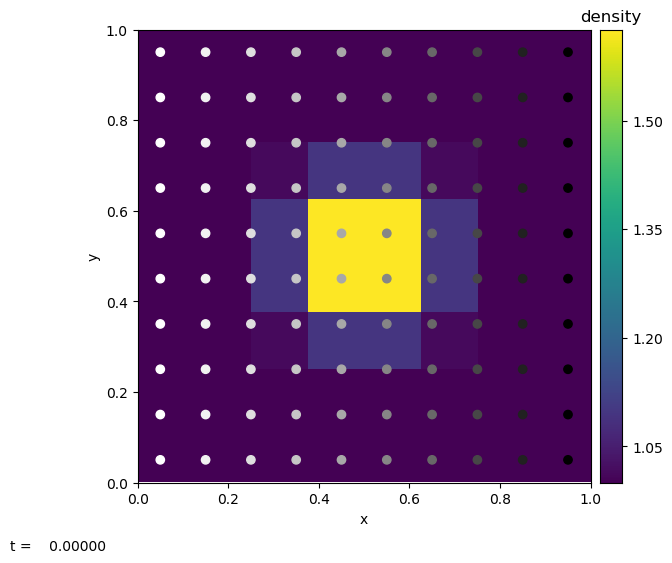

    1    0.10000    0.10000


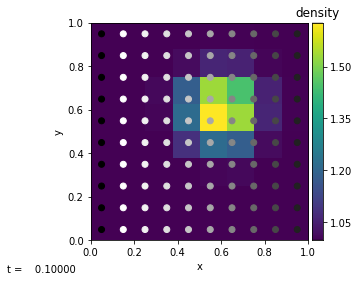

outputting...
main:  0.5435585975646973
   vis:  0.1849346160888672


In [3]:
pyro_sim = Pyro(solver)
pyro_sim.initialize_problem(problem_name, param_file, other_commands=other_commands)
pyro_sim.run_sim()

In [4]:
dens = pyro_sim.sim.cc_data.get_var("density")
dens.pretty_print(show_ghost=False)

         1         1         1    1.0004    1.0014    1.0013    1.0002         1 
         1         1    1.0003    1.0162    1.0626    1.0579    1.0077    1.0002 
         1    1.0002    1.0116     1.185    1.5348    1.4466    1.0579    1.0013 
         1    1.0001    1.0064    1.2169    1.6258    1.5348    1.0626    1.0014 
         1   0.99994    0.9985     1.085    1.2169     1.185    1.0162    1.0004 
         1   0.99995   0.99797    0.9985    1.0064    1.0116    1.0003         1 
         1         1   0.99995   0.99994    1.0001    1.0002         1         1 
         1         1         1         1         1         1         1         1 

         ^ y
         |
         +---> x
        


## advection_fv4

In [5]:
solver = "advection_fv4"
problem_name = "smooth"
param_file = "inputs.smooth"
other_commands = ["driver.max_steps=1", "mesh.nx=8",  "mesh.ny=8"]

pyro ...
initializing the smooth FV advection problem...


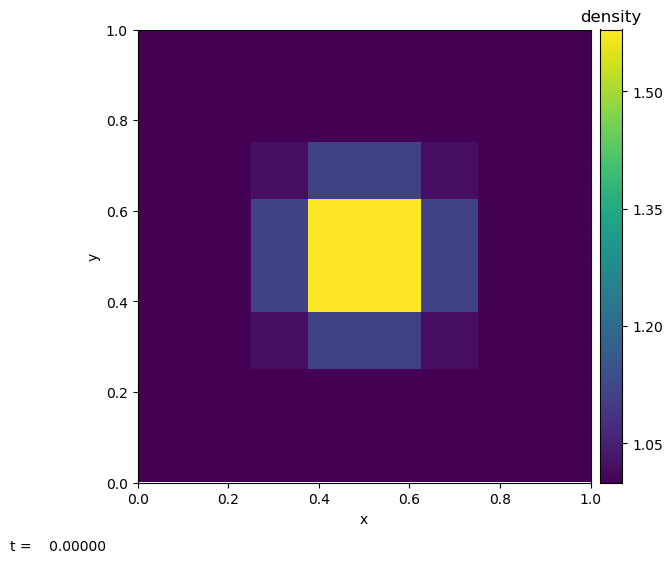

    1    0.05000    0.05000


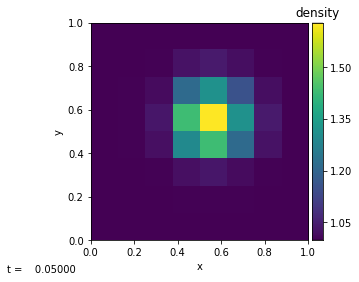

outputting...
parameter particles.n_particles never used
parameter particles.particle_generator never used
main:  0.40309882164001465
   evolve:  0.002089262008666992
   vis:  0.1676931381225586


In [6]:
pyro_sim = Pyro(solver)
pyro_sim.initialize_problem(problem_name, param_file, other_commands=other_commands)
pyro_sim.run_sim()

In [7]:
dens = pyro_sim.sim.cc_data.get_var("density")
dens.pretty_print(show_ghost=False)

         1         1   0.99983   0.99859   0.99773   0.99854   0.99976         1 
   0.99997    1.0001     1.002    1.0275    1.0421    1.0212    1.0024   0.99976 
   0.99969    1.0009    1.0174    1.2163    1.3164     1.157    1.0212   0.99854 
   0.99921     1.002    1.0357    1.4336    1.6289    1.3164    1.0421   0.99773 
   0.99952    1.0008    1.0228    1.2966    1.4336    1.2163    1.0275   0.99859 
         1         1    1.0025    1.0228    1.0357    1.0174     1.002   0.99983 
         1    1.0001         1    1.0008     1.002    1.0009    1.0001         1 
         1         1         1   0.99952   0.99921   0.99969   0.99997         1 

         ^ y
         |
         +---> x
        


## advection_rk

In [8]:
solver = "advection_rk"
problem_name = "tophat"
param_file = "inputs.tophat"
other_commands = ["driver.max_steps=1", "mesh.nx=8",  "mesh.ny=8"]

pyro ...
initializing the tophat advection problem...


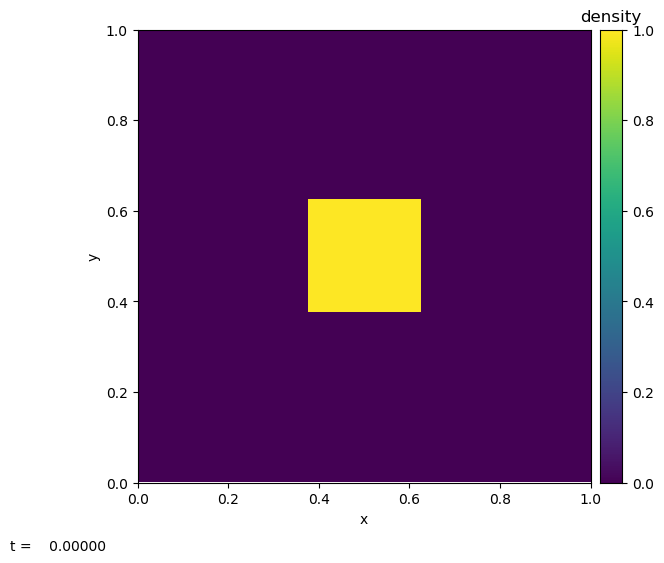

    1    0.05000    0.05000


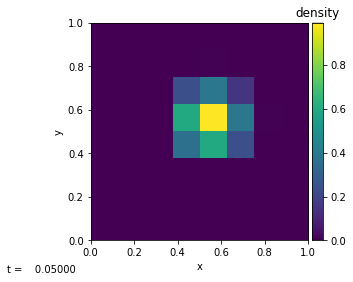

outputting...
parameter particles.n_particles never used
parameter particles.particle_generator never used
main:  0.4256000518798828
   evolve:  0.004318952560424805
   vis:  0.1750965118408203


In [9]:
pyro_sim = Pyro(solver)
pyro_sim.initialize_problem(problem_name, param_file, other_commands=other_commands)
pyro_sim.run_sim()

In [10]:
dens = pyro_sim.sim.cc_data.get_var("density")
dens.pretty_print(show_ghost=False)

         0         0         0         0         0         0         0         0 
         0         0         0 0.0030222 0.0040889 0.00278520.00071111         0 
         0         0         0    0.2403   0.39295   0.15301 0.0027852         0 
         0         0         0   0.60178   0.99111   0.39295 0.0040889         0 
         0         0         0   0.36533   0.60178    0.2403 0.0030222         0 
         0         0         0         0         0         0         0         0 
         0         0         0         0         0         0         0         0 
         0         0         0         0         0         0         0         0 

         ^ y
         |
         +---> x
        


## burgers

In [11]:
solver = "burgers"
problem_name = "sine"
param_file = "inputs.sine"
other_commands = ["driver.max_steps=1", "mesh.nx=8",  "mesh.ny=8", "driver.verbose=0"]

pyro ...
initializing the sinusoidal burgers problem...


/home/alice/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:2961: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))


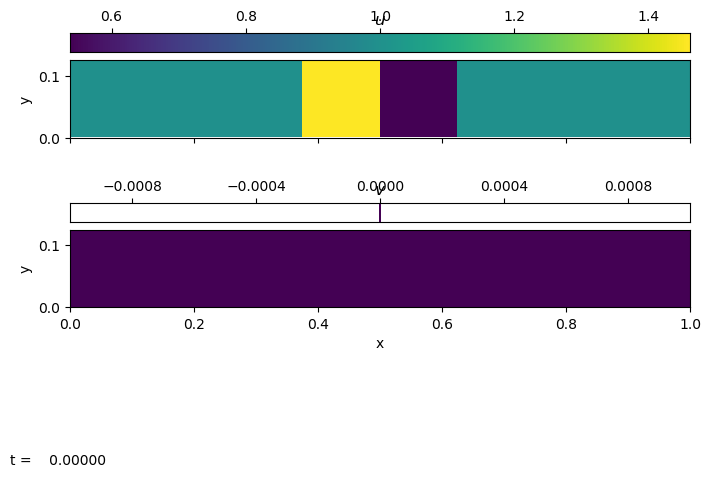

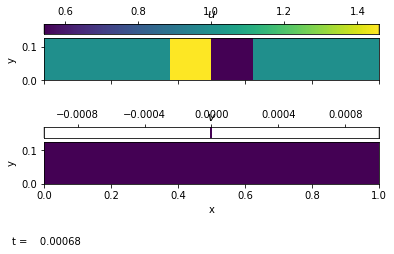

In [12]:
sim = pyro.doit(solver, problem_name, param_file, other_commands=other_commands)

In [13]:
dens = sim.cc_data.get_var("xvel")
dens.pretty_print(show_ghost=False)

         1         1         1    1.4588   0.54312   0.99806         1         1 
         1         1         1    1.4588   0.54312   0.99806         1         1 
         1         1         1    1.4588   0.54312   0.99806         1         1 
         1         1         1    1.4588   0.54312   0.99806         1         1 
         1         1         1    1.4588   0.54312   0.99806         1         1 
         1         1         1    1.4588   0.54312   0.99806         1         1 
         1         1         1    1.4588   0.54312   0.99806         1         1 
         1         1         1    1.4588   0.54312   0.99806         1         1 

         ^ y
         |
         +---> x
        


## burgers_viscid

In [14]:
solver = "burgers_viscid"
problem_name = "step"
param_file = "inputs.step"
other_commands = ["driver.max_steps=1", "mesh.nx=8",  "mesh.ny=8", "driver.verbose=0"]

pyro ...
initializing the step burgers problem...


/home/alice/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3285: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))


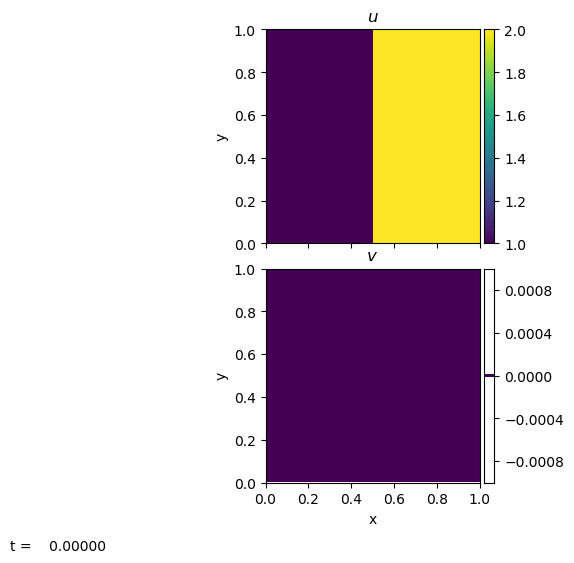

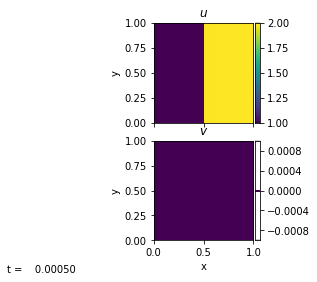

In [15]:
sim = pyro.doit(solver, problem_name, param_file, other_commands=other_commands)

In [16]:
dens = sim.cc_data.get_var("yvel")
dens.pretty_print(show_ghost=False)

         0         0         0         0         0         0         0         0 
         0         0         0         0         0         0         0         0 
         0         0         0         0         0         0         0         0 
         0         0         0         0         0         0         0         0 
         0         0         0         0         0         0         0         0 
         0         0         0         0         0         0         0         0 
         0         0         0         0         0         0         0         0 
         0         0         0         0         0         0         0         0 

         ^ y
         |
         +---> x
        


## compressible

In [17]:
solver = "compressible"
problem_name = "rt"
param_file = "inputs.rt"
other_commands = ["driver.max_steps=1", "mesh.nx=8",  "mesh.ny=24", "driver.verbose=0"]

pyro ...
initializing the rt problem...


/home/alice/Documents/pyro2/compressible/problems/rt.py:69: RuntimeWarning: invalid value encountered in true_divide
  0.5*(xmom[:, :]**2 + ymom[:, :]**2)/dens[:, :]
/home/alice/Documents/pyro2/compressible/simulation.py:61: RuntimeWarning: invalid value encountered in true_divide
  q[:, :, ivars.iu] = U[:, :, ivars.ixmom]/U[:, :, ivars.idens]
/home/alice/Documents/pyro2/compressible/simulation.py:62: RuntimeWarning: invalid value encountered in true_divide
  q[:, :, ivars.iv] = U[:, :, ivars.iymom]/U[:, :, ivars.idens]


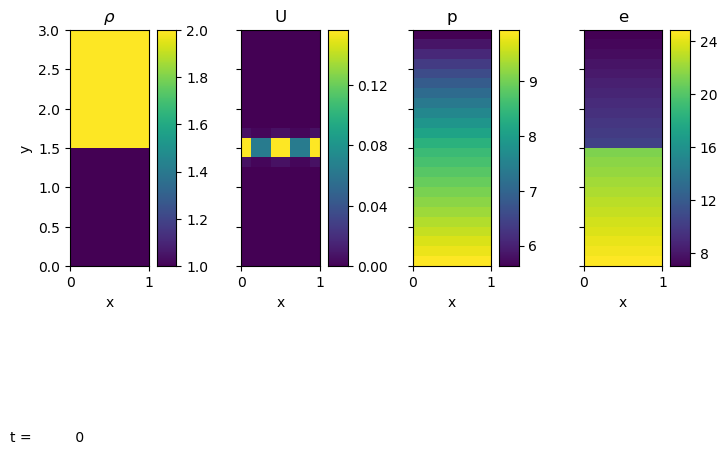

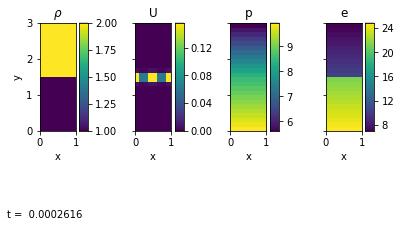

In [18]:
pyro_sim = Pyro(solver)
pyro_sim.initialize_problem(problem_name, param_file, other_commands=other_commands)
pyro_sim.run_sim()

In [19]:
dens = pyro_sim.sim.cc_data.get_var("density")
dens.pretty_print(show_ghost=False)

         2         2         2         2         2         2         2         2 
         2         2         2         2         2         2         2         2 
         2         2         2         2         2         2         2         2 
         2         2         2         2         2         2         2         2 
         2         2         2         2         2         2         2         2 
         2         2         2         2         2         2         2         2 
         2         2         2         2         2         2         2         2 
         2         2         2         2         2         2         2         2 
         2         2         2         2         2         2         2         2 
         2         2         2         2         2         2         2         2 
    2.0004    2.0002    1.9999    1.9997    1.9997    1.9999    2.0002    2.0004 
         2         2    1.9999    1.9997    1.9997    1.9999         2         2 
   0.99984   0.9

## compressible_fv4

In [20]:
solver = "compressible_fv4"
problem_name = "kh"
param_file = "inputs.kh"
other_commands = ["driver.max_steps=1", "mesh.nx=8",  "mesh.ny=8", "driver.verbose=0"]

pyro ...
warning, key: driver.splitting not defined
warning, key: io.tplot not defined
initializing the Kelvin-Helmholtz problem...


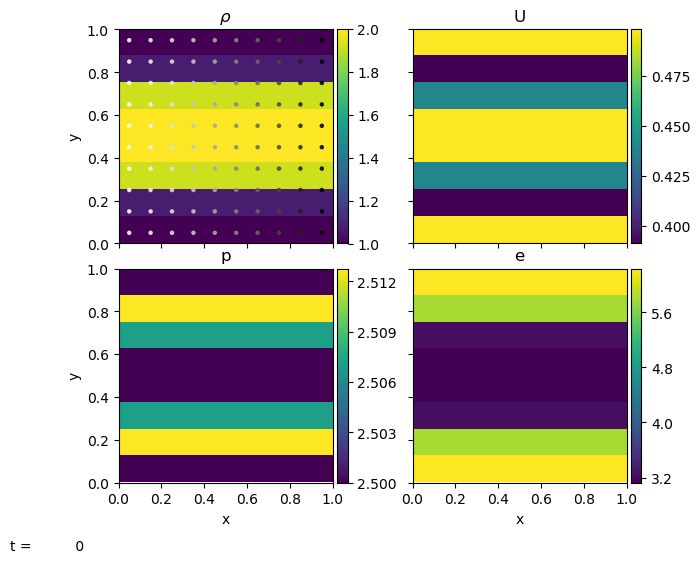

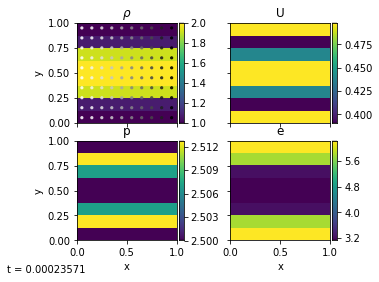

In [21]:
pyro_sim = Pyro(solver)
pyro_sim.initialize_problem(problem_name, param_file, other_commands=other_commands)
pyro_sim.run_sim()

In [22]:
e = pyro_sim.sim.cc_data.get_var("eint")
e.pretty_print(show_ghost=False)

    6.2377    6.2377    6.2377    6.2377    6.2377    6.2377    6.2377    6.2377 
    5.8296    5.8296    5.8296    5.8296    5.8296    5.8296    5.8296    5.8296 
    3.2605    3.2605    3.2605    3.2605    3.2605    3.2605    3.2605    3.2605 
    3.1281    3.1281    3.1281    3.1281    3.1281    3.1281    3.1281    3.1281 
    3.1281    3.1281    3.1281    3.1281    3.1281    3.1281    3.1281    3.1281 
    3.2605    3.2605    3.2605    3.2605    3.2605    3.2605    3.2605    3.2605 
    5.8296    5.8296    5.8296    5.8296    5.8296    5.8296    5.8296    5.8296 
    6.2377    6.2377    6.2377    6.2377    6.2377    6.2377    6.2377    6.2377 

         ^ y
         |
         +---> x
        


## compressible_rk

In [23]:
solver = "compressible_rk"
problem_name = "quad"
param_file = "inputs.quad"
other_commands = ["driver.max_steps=1", "mesh.nx=16",  "mesh.ny=16", "driver.verbose=0"]

pyro ...
initializing the quadrant problem...


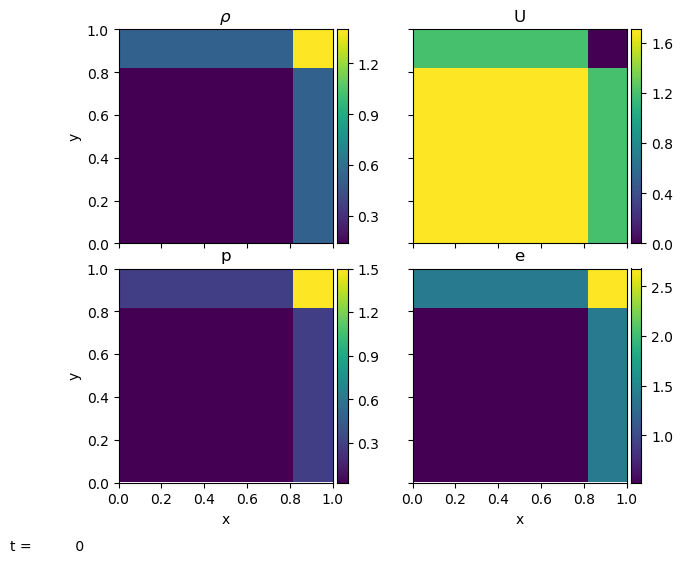

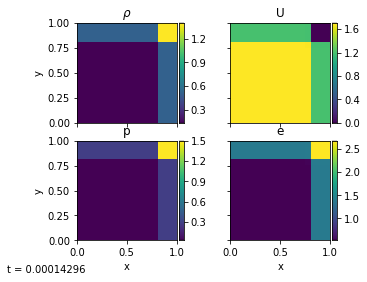

In [24]:
pyro_sim = Pyro(solver)
pyro_sim.initialize_problem(problem_name, param_file, other_commands=other_commands)
pyro_sim.run_sim()

In [25]:
p = pyro_sim.sim.cc_data.get_var("pressure")
p.pretty_print(show_ghost=False)

       0.3       0.3       0.3       0.3       0.3       0.3       0.3       0.3       0.3       0.3       0.3       0.3   0.30292    1.4997       1.5       1.5 
       0.3       0.3       0.3       0.3       0.3       0.3       0.3       0.3       0.3       0.3       0.3       0.3   0.30292    1.4997       1.5       1.5 
   0.29994   0.29994   0.29994   0.29994   0.29994   0.29994   0.29994   0.29994   0.29994   0.29994   0.29994   0.29994   0.30304    1.4991    1.4997    1.4997 
  0.029558  0.029558  0.029558  0.029558  0.029558  0.029558  0.029558  0.029558  0.029558  0.029558  0.029558  0.029559  0.030208   0.30304   0.30292   0.30292 
  0.029032  0.029032  0.029032  0.029032  0.029032  0.029032  0.029032  0.029032  0.029032  0.029032  0.029032  0.029032  0.029559   0.29994       0.3       0.3 
  0.029032  0.029032  0.029032  0.029032  0.029032  0.029032  0.029032  0.029032  0.029032  0.029032  0.029032  0.029032  0.029558   0.29994       0.3       0.3 
  0.029032  0.029032  0.0290

## compressible_sdc

In [26]:
solver = "compressible_sdc"
problem_name = "sod"
param_file = "inputs.sod.y"
other_commands = ["driver.max_steps=1", "mesh.nx=4",  "mesh.ny=16", "driver.verbose=0"]

pyro ...
initializing the sod problem...


/home/alice/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3285: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))


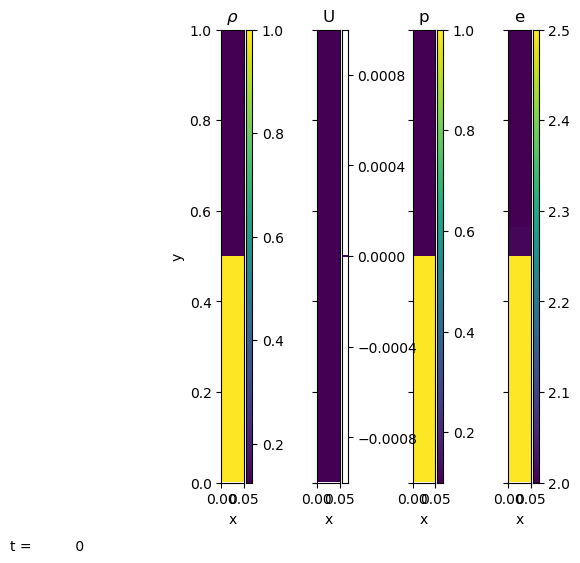

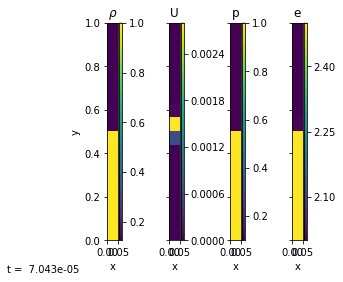


          The script analysis/sod_compare.py can be used to compare
          this output to the exact solution.  Some sample exact solution
          data is present as analysis/sod-exact.out
          


In [27]:
pyro_sim = Pyro(solver)
pyro_sim.initialize_problem(problem_name, param_file, other_commands=other_commands)
pyro_sim.run_sim()

In [28]:
p = pyro_sim.sim.cc_data.get_var("pressure")
p.pretty_print(show_ghost=False)

       0.1       0.1       0.1       0.1 
       0.1       0.1       0.1       0.1 
       0.1       0.1       0.1       0.1 
       0.1       0.1       0.1       0.1 
       0.1       0.1       0.1       0.1 
       0.1       0.1       0.1       0.1 
  0.099996  0.099996  0.099996  0.099996 
   0.10175   0.10175   0.10175   0.10175 
   0.99825   0.99825   0.99825   0.99825 
         1         1         1         1 
         1         1         1         1 
         1         1         1         1 
         1         1         1         1 
         1         1         1         1 
         1         1         1         1 
         1         1         1         1 

         ^ y
         |
         +---> x
        


## diffusion

In [29]:
solver = "diffusion"
problem_name = "gaussian"
param_file = "inputs.gaussian"
other_commands = ["driver.max_steps=1", "mesh.nx=16",  "mesh.ny=16", "driver.verbose=0"]

pyro ...
initializing the Gaussian diffusion problem...


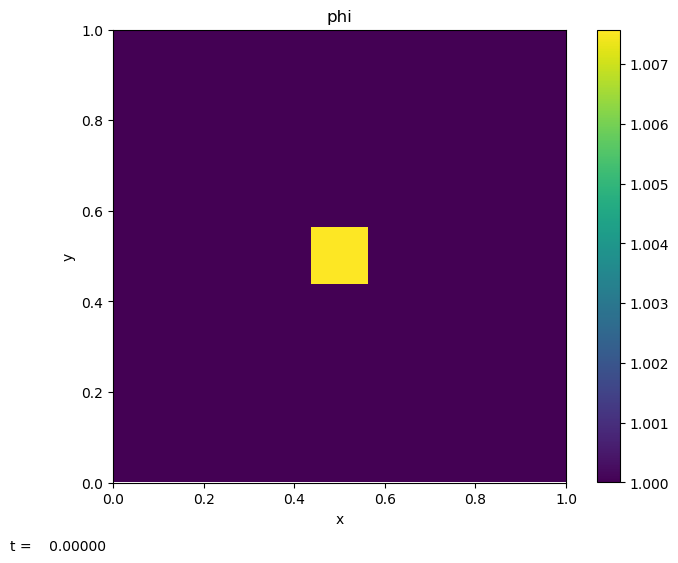

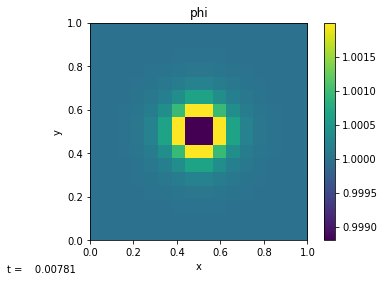


          The solution can be compared to the analytic solution with
          the script analysis/gauss_diffusion_compare.py
          


In [30]:
pyro_sim = Pyro(solver)
pyro_sim.initialize_problem(problem_name, param_file, other_commands=other_commands)
pyro_sim.run_sim()

In [31]:
dens = pyro_sim.sim.cc_data.get_var("phi")
dens.pretty_print(show_ghost=False)

         1         1         1         1         1         1         1         1         1         1         1         1         1         1         1         1 
         1         1         1         1         1         1         1         1         1         1         1         1         1         1         1         1 
         1         1         1         1         1         1         1         1         1         1         1         1         1         1         1         1 
         1         1         1         1         1         1    1.0001    1.0001    1.0001    1.0001         1         1         1         1         1         1 
         1         1         1         1         1    1.0001    1.0001    1.0002    1.0002    1.0001    1.0001         1         1         1         1         1 
         1         1         1         1    1.0001    1.0002    1.0004    1.0007    1.0007    1.0004    1.0002    1.0001         1         1         1         1 
         1         1        

## incompressible

In [32]:
solver = "incompressible"
problem_name = "shear"
param_file = "inputs.shear"
other_commands = ["driver.max_steps=1", "mesh.nx=8",  "mesh.ny=8", "driver.verbose=0"]

pyro ...
initializing the incompressible shear problem...
y_half =  0.5
delta_s =  0.05
rho_s =  42.0
extrema:  -1.0 0.9999997110039925


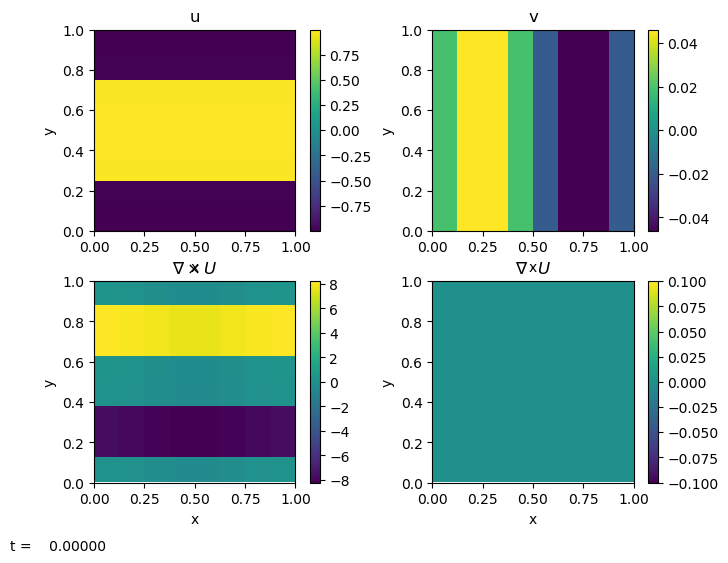

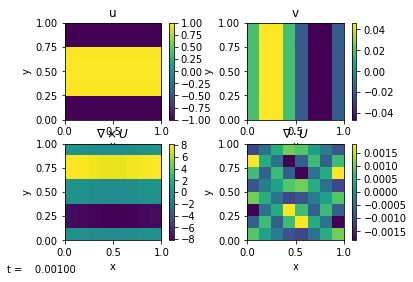

In [33]:
pyro_sim = Pyro(solver)
pyro_sim.initialize_problem(problem_name, param_file, other_commands=other_commands)
pyro_sim.run_sim()

In [34]:
u = pyro_sim.sim.cc_data.get_var("x-velocity")
u.pretty_print(show_ghost=False)

        -1   -1.0001   -1.0001        -1  -0.99995  -0.99992  -0.99992  -0.99995 
  -0.98937  -0.98915  -0.98915  -0.98937   -0.9894  -0.98929  -0.98929   -0.9894 
    0.9894   0.98929   0.98929    0.9894   0.98937   0.98915   0.98915   0.98937 
   0.99995   0.99992   0.99992   0.99995         1    1.0001    1.0001         1 
         1    1.0001    1.0001         1   0.99995   0.99992   0.99992   0.99995 
   0.98937   0.98915   0.98915   0.98937    0.9894   0.98929   0.98929    0.9894 
   -0.9894  -0.98929  -0.98929   -0.9894  -0.98937  -0.98915  -0.98915  -0.98937 
  -0.99995  -0.99992  -0.99992  -0.99995        -1   -1.0001   -1.0001        -1 

         ^ y
         |
         +---> x
        


## lm_atm

In [35]:
solver = "lm_atm"
problem_name = "bubble"
param_file = "inputs.bubble"
other_commands = ["driver.max_steps=1", "mesh.nx=16",  "mesh.ny=16", "driver.verbose=0"]

pyro ...
initializing the bubble problem...


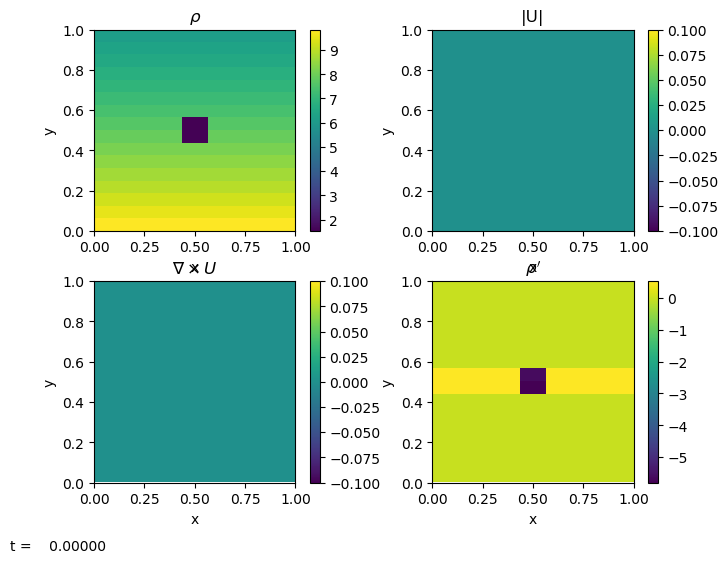

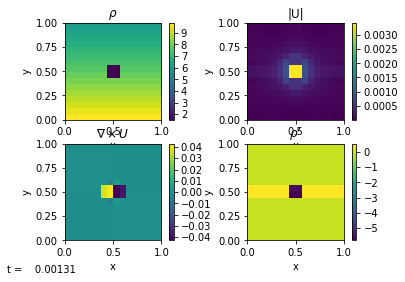

In [36]:
pyro_sim = Pyro(solver)
pyro_sim.initialize_problem(problem_name, param_file, other_commands=other_commands)
pyro_sim.run_sim()

In [37]:
v = pyro_sim.sim.cc_data.get_var("y-velocity")
v.pretty_print(show_ghost=False, fmt="%10.3g")

 -4.31e-05 -3.83e-05 -2.87e-05 -1.44e-05  3.88e-06  2.41e-05  4.25e-05  5.39e-05  5.39e-05  4.25e-05  2.41e-05  3.88e-06 -1.44e-05 -2.87e-05 -3.83e-05 -4.31e-05 
  -4.7e-05 -4.23e-05 -3.28e-05  -1.8e-05  1.86e-06  2.54e-05  4.86e-05  6.42e-05  6.42e-05  4.86e-05  2.54e-05  1.86e-06  -1.8e-05 -3.28e-05 -4.23e-05  -4.7e-05 
 -5.51e-05 -5.09e-05 -4.18e-05 -2.65e-05 -3.73e-06  2.69e-05  6.19e-05  8.92e-05  8.92e-05  6.19e-05  2.69e-05 -3.73e-06 -2.65e-05 -4.18e-05 -5.09e-05 -5.51e-05 
 -6.73e-05  -6.4e-05 -5.65e-05 -4.22e-05 -1.69e-05  2.42e-05  8.24e-05   0.00014   0.00014  8.24e-05  2.42e-05 -1.69e-05 -4.22e-05 -5.65e-05  -6.4e-05 -6.73e-05 
 -8.22e-05 -8.11e-05 -7.75e-05 -6.81e-05 -4.53e-05  4.76e-06  0.000103  0.000247  0.000247  0.000103  4.76e-06 -4.53e-05 -6.81e-05 -7.75e-05 -8.11e-05 -8.22e-05 
 -9.77e-05 -9.99e-05 -0.000104 -0.000106 -9.99e-05 -6.11e-05  7.66e-05  0.000492  0.000492  7.66e-05 -6.11e-05 -9.99e-05 -0.000106 -0.000104 -9.99e-05 -9.77e-05 
 -6.65e-05 -7.26e-05 -8.57e-